# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 21:33:41.407134: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T21:33:44.789679
2025-04-14 21:33:44.789679


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 5
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close %'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 21:33:38"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

IPCA %                        -0.104904
INPC %                        -0.104528
IBOVESPA - Spread             -0.090141
Nasdaq - Spread %             -0.083494
FTSE 100 - Spread             -0.077431
CAC 40 - Spread               -0.075797
Taxa acumulada no período %   -0.072398
STOXX 600 - Spread            -0.070673
FTSE MIB - Spread             -0.070577
STOXX 600 - Spread %          -0.070486
CAC 40 - Spread %             -0.069626
FTSE MIB - Spread %           -0.067484
Dow Jones - Spread            -0.067139
S&P 500 - Spread %            -0.065647
S&P 500 - Spread              -0.065500
DAX - Spread                  -0.061319
Dólar - Spread                -0.056498
Nasdaq - Spread               -0.055014
FTSE 100 - Spread %           -0.054914
Petróleo WTI - Spread         -0.054419
Kospi - Spread %              -0.054199
Shanghai SE - Open %          -0.053242
Petróleo WTI - Spread %       -0.052938
PIB %                         -0.052670
Dow Jones - Spread %          -0.050204


In [11]:
corr.index

Index(['IPCA %', 'INPC %', 'IBOVESPA - Spread', 'Nasdaq - Spread %',
       'FTSE 100 - Spread', 'CAC 40 - Spread', 'Taxa acumulada no período %',
       'STOXX 600 - Spread', 'FTSE MIB - Spread', 'STOXX 600 - Spread %',
       ...
       'S&P 500 - Low %', 'DAX - Close %', 'CAC 40 - Close %',
       'FTSE 100 - Close %', 'Nasdaq - Close %', 'Dow Jones - Close %',
       'S&P 500 - Close %', 'IBOVESPA - Low %', 'IBOVESPA - High %',
       'IBOVESPA - Close %'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

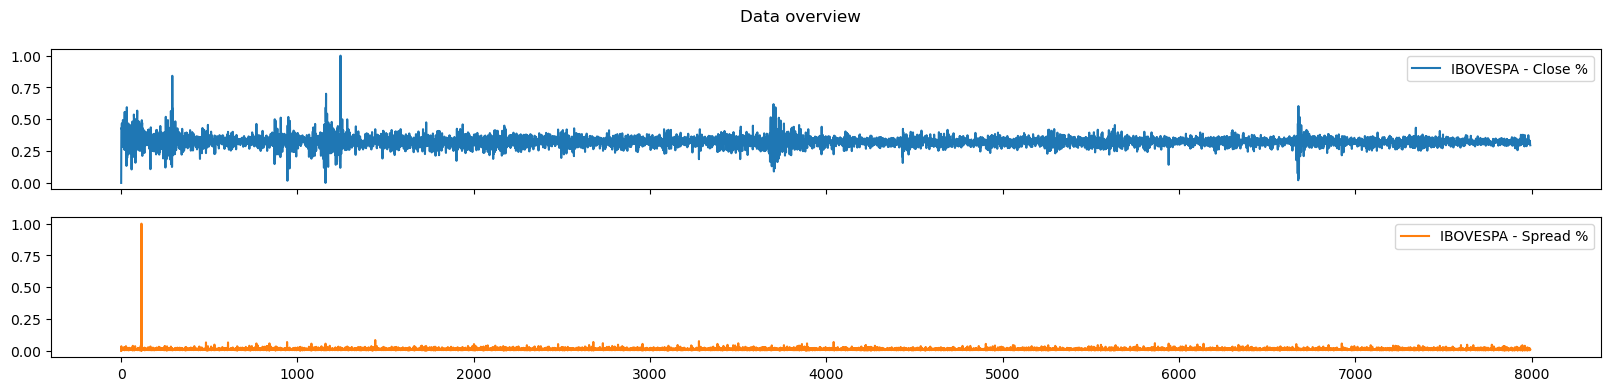

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

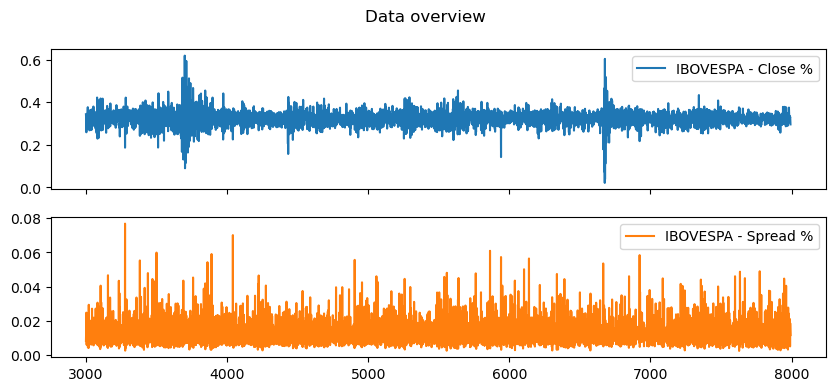

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

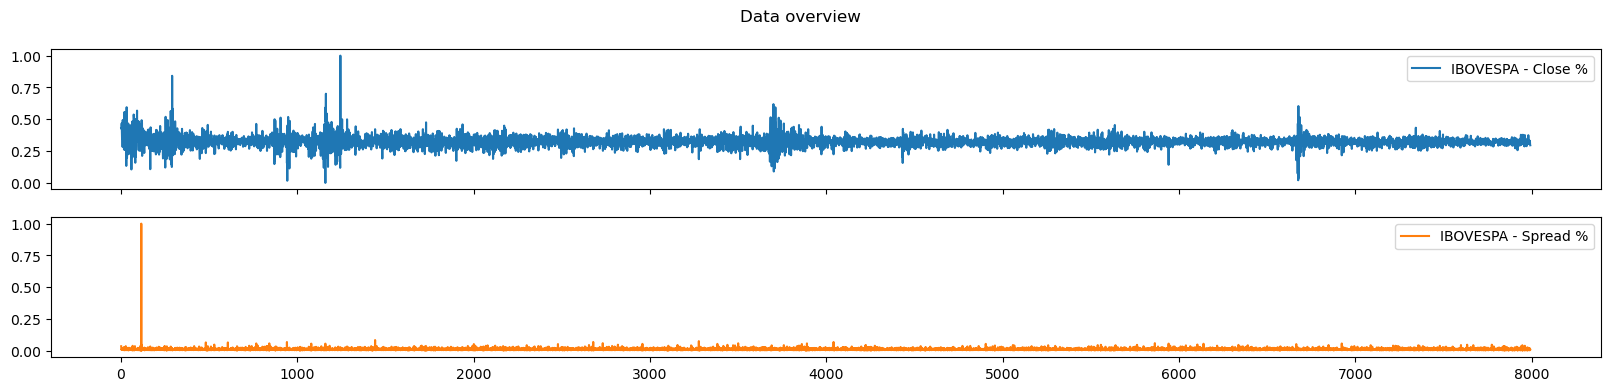

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close %']

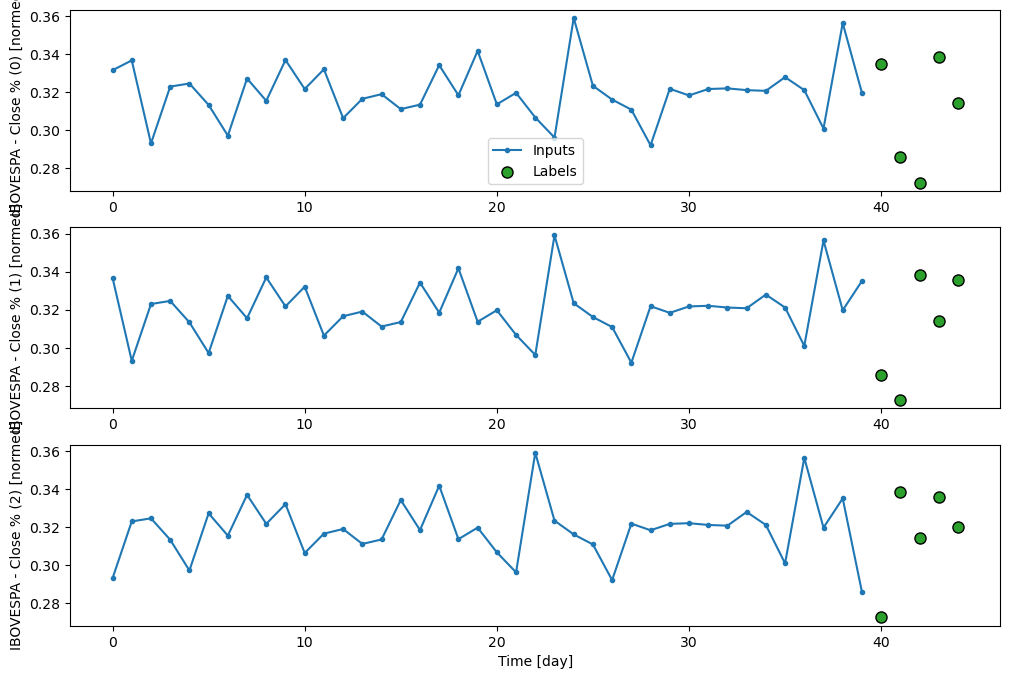

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11:20 3s/step - loss: 0.3400 - mean_absolute_error: 0.3400 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3539

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.3114 - mean_absolute_error: 0.3114 - mean_absolute_percentage_error: 89.8620 - mean_squared_error: 0.1092 - root_mean_squared_error: 0.3293  

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2678 - mean_absolute_error: 0.2678 - mean_absolute_percentage_error: 78.0539 - mean_squared_error: 0.0868 - root_mean_squared_error: 0.2915

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2474 - mean_absolute_error: 0.2474 - mean_absolute_percentage_error: 72.1920 - mean_squared_error: 0.0772 - root_mean_squared_error: 0.2738

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2243 - mean_absolute_error: 0.2243 - mean_absolute_percentage_error: 65.6714 - mean_squared_error: 0.0672 - root_mean_squared_error: 0.2540

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2099 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 61.5638 - mean_squared_error: 0.0614 - root_mean_squared_error: 0.2416

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1974 - mean_absolute_error: 0.1974 - mean_absolute_percentage_error: 57.9976 - mean_squared_error: 0.0566 - root_mean_squared_error: 0.2309

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1865 - mean_absolute_error: 0.1865 - mean_absolute_percentage_error: 54.8648 - mean_squared_error: 0.0526 - root_mean_squared_error: 0.2215

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1771 - mean_absolute_error: 0.1771 - mean_absolute_percentage_error: 52.1656 - mean_squared_error: 0.0491 - root_mean_squared_error: 0.2133

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1690 - mean_absolute_error: 0.1690 - mean_absolute_percentage_error: 49.9903 - mean_squared_error: 0.0462 - root_mean_squared_error: 0.2062

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1621 - mean_absolute_error: 0.1621 - mean_absolute_percentage_error: 48.1300 - mean_squared_error: 0.0437 - root_mean_squared_error: 0.1998

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1541 - mean_absolute_error: 0.1541 - mean_absolute_percentage_error: 22750.2754 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.1925

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1491 - mean_absolute_error: 0.1491 - mean_absolute_percentage_error: 40430.5859 - mean_squared_error: 0.0391 - root_mean_squared_error: 0.1877

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1430 - mean_absolute_error: 0.1430 - mean_absolute_percentage_error: 58324.3203 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1820

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1376 - mean_absolute_error: 0.1376 - mean_absolute_percentage_error: 71532.9688 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1768

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1339 - mean_absolute_error: 0.1339 - mean_absolute_percentage_error: 79183.2734 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1733

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1305 - mean_absolute_error: 0.1305 - mean_absolute_percentage_error: 85349.3438 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1699

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1274 - mean_absolute_error: 0.1274 - mean_absolute_percentage_error: 90329.9453 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1668

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1244 - mean_absolute_error: 0.1244 - mean_absolute_percentage_error: 94354.7578 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1638

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 97602.5312 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1611

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 100213.9297 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1585

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 102300.7734 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1560

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1138 - mean_absolute_error: 0.1138 - mean_absolute_percentage_error: 104419.6797 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1529

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 105602.1406 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1508

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1097 - mean_absolute_error: 0.1097 - mean_absolute_percentage_error: 106498.5078 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1487

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 107154.1875 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1467

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1060 - mean_absolute_error: 0.1060 - mean_absolute_percentage_error: 107606.7344 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1448

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1043 - mean_absolute_error: 0.1043 - mean_absolute_percentage_error: 107887.3672 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1430

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 108022.1875 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1412

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1011 - mean_absolute_error: 0.1011 - mean_absolute_percentage_error: 108033.1172 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1396

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 107938.6250 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1380

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 107754.3594 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1364

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 107493.6250 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1349

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 107167.7500 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1335

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 106786.4297 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1321

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 106357.9844 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1308

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 105889.5703 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1295

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 105387.3594 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1283

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 104856.6562 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1272

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 104302.0781 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1261

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 103727.6250 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1250

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 103136.7500 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1239

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 102532.4844 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1229

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 101917.4609 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1219

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 101293.9531 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1209

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 100663.9609 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1200

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 99816.8828 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1188 

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 99178.1641 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1179

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 98324.4297 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1167

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 97683.9453 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1159

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 96831.4688 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1148

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 96194.2578 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1140

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 95559.6406 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1132

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 94718.5078 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1122

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 94092.0547 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1115

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 93469.8359 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1108

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 92852.2188 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1101

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 92239.4844 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1094

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 91631.9062 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1087

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 91029.7031 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1081

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 90433.0469 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1074

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 89842.0938 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1068

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 89256.9688 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1062

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 88677.7734 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1056

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 88104.5859 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1050

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 87537.4609 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1044

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 86976.4375 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1039

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 86421.5547 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1033

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 85872.8125 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1028

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 85330.2109 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1023

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 84793.7500 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1017

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 84263.3984 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1012

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 83565.7422 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1006

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 83049.5547 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1001

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 82539.3672 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.0996

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 81870.3516 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0990 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8898 - val_mean_squared_error: 2.5350e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.5820 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1012

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 24.8744 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0960 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.2581 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 23.0436 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0888

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 22.3281 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0866

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 21.2387 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0834

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.4465 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0810

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.4632 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0780

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.7990 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.5588 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 16066.2246 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 35595.4883 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 55283.9492 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 69769.0391 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 78141.5156 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 86826.6875 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 91895.5938 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 95991.8516 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 99297.3672 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 101955.2812 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 104079.3750 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 105760.8984 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 107073.6250 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 108077.6797 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 109020.2031 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109481.1172 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109767.0781 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109904.6406 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109916.1172 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 109767.3438 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 109552.8203 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 109153.9531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 108784.0156 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 108213.3438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 107570.2266 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 107049.1953 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 106500.8125 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105929.5469 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105339.2656 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 104733.3594 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 104114.7422 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103485.9688 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 102849.2812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102206.6094 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101559.6484 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100692.8906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100041.3516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99172.7188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 98522.5000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97874.2344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97228.6016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96372.8672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95735.5312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95102.5078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94265.7969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93644.1406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93027.7969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92416.9844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 91811.8672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91212.6016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90619.3047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90032.0625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89450.9453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 88876.0156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88307.3125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87558.7500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87004.6172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86456.7344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85915.0781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85379.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84850.3516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84154.1875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83469.4531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83301.1719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546 - val_loss: 0.0128 - val_mean_absolute_error: 0.0128 - val_mean_absolute_percentage_error: 3.9361 - val_mean_squared_error: 2.5975e-04 - val_root_mean_squared_error: 0.0161 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 28.5069 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1012

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 24.9200 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0967 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 23.1563 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0901

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 22.8997 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.1643 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0869

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.3348 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0844

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.5312 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0819

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.7586 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0796

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 19.0766 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0775

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 18.5684 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.3471 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 15064.3350 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 33374.5156 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 51833.9531 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 62390.3945 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 70836.0391 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 77626.9922 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 83105.5234 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 87532.3750 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 91108.8594 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 94821.5859 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 96969.4766 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 98675.9297 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 100015.1328 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 101047.3828 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 101822.0391 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 102379.7344 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 102754.1406 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 102973.3125 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 103060.7344 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 103036.1406 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 102857.5469 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 102632.1094 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 102231.2422 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 101867.7031 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 101459.1875 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 101012.5312 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 100533.6172 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 100027.5234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 99498.6328 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621 

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 98950.7656 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 98387.2344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 97810.9219 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 97224.3281 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 96429.9453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 95827.3906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 95220.8125 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 94611.5938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 94204.5938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 93593.6016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 92982.8672 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 92373.2344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 91765.4375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 91160.1016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 90557.7891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 89958.9766 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 89364.0859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 88773.4531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 88187.4062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 87606.1875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 86839.1250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 86269.9844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 85706.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 85148.1406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 84595.6484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 83867.9141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 83328.8672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 82795.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 82268.3047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 81574.2812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 81060.5938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 80552.7500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 80050.7266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 79554.4844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 78901.7734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 78418.8906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 78102.0000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 3.7796 - val_mean_squared_error: 2.3746e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.5526 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1006

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 24.8697 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0953 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.1390 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 23.3384 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.7282 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0871

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 21.9348 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0847

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 21.1108 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0823

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 20.3221 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 20.0719 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.5996 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 19.0151 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 30/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.8717 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 32/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.7204 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.5793 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 15231.2900 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 28073.7578 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 38975.5078 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 43807.0117 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 52408.1719 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 59787.7930 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 63081.5391 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 68980.2422 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 76360.7500 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 82309.4609 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 87114.5781 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 89794.2500 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 92118.0938 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 95033.4141 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 97373.5156 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 99238.5156 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 100708.9219 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 101850.0234 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 102715.1172 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 103348.0156 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 103784.9375 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 104056.0156 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 104186.4219 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 104197.2891 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 104106.4609 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 103929.0156 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 103677.7812 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 103363.7109 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 103124.0859 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 102725.3828 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 102285.9297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 101811.9766 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 101479.5312 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 100959.6797 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 100418.1328 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 99858.5625 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621 

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 99284.1797 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 98697.7500 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 98101.6953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 97498.1328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 96888.8984 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 96480.3906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 96070.5078 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 95659.6328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 95042.2344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 94424.4531 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 93807.2344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 93191.3906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 92577.6172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 91966.5391 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 91358.6875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 90955.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 90353.9844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 89756.8125 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 89164.2656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 88576.6094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 87994.0625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 87416.8125 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 86845.0156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 86278.8047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 85718.2734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 85163.5156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 84614.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 84251.8984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 83712.7812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 83179.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 82827.4141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 82477.8750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 82130.9609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 81786.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 81615.5234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 81105.9766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 80602.2969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 80104.4375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 79612.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 79126.6484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 78967.1250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 3.7775 - val_mean_squared_error: 2.3658e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.5324 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 24.8568 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0950 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.1694 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 23.4356 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0888

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.8547 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 22.0713 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0847

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 21.2511 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0823

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.4610 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.7329 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 19.1391 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.9021 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.6667 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 22552.6699 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 40101.7422 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 49669.0898 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 57862.8672 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 64904.6211 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 73690.6641 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 80755.3203 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0710

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 86454.6719 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 91059.9531 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 94780.5859 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 96851.8438 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 99444.2812 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 100877.4219 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 102652.6562 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104045.8438 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 105119.7031 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105925.5781 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106505.7578 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 106784.7031 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107063.6172 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 107167.7266 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 107214.2188 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 107208.9766 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 107188.6328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 107115.5234 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 106932.9453 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 106674.4531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 106351.3047 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 105973.1094 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0636

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 105548.1328 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 105083.4688 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 104412.6562 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 103877.7812 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 103130.5547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 102352.3516 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 101752.8125 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 100937.1875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 100316.1719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 99689.3281 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606 

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 98847.2891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 98212.8906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 97365.5078 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 96730.1641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 96095.9531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 95463.6562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 94833.9219 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 93999.2656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 93377.6250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92760.1953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 92147.3203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 91539.2891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 90936.3750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 90338.7891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89746.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 89160.2891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88579.6484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 88004.8906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87436.0859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86873.2969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 86316.5781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85765.9375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85221.3906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84504.8125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83974.4688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83450.1953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82931.9531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 82419.7031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81745.9688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81249.5156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 3.7780 - val_mean_squared_error: 2.3632e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.5223 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 24.0091 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0923 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.2672 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 22.8936 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0875

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 22.1402 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0853

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 21.0487 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0820

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 20.2558 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0797

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.5255 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0775

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.9312 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.6937 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 18.4571 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 22574.5918 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 40140.9023 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 53975.4453 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 64968.1328 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 73762.8047 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 80834.3984 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 88186.1797 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 92480.0625 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 95947.4688 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 98739.6016 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 100976.2578 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 102753.2344 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104147.7812 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105222.6953 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 106029.3672 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 106610.1172 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 107000.0000 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 107272.7422 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 107322.7812 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 107262.2891 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 107107.6953 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 106872.9453 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 106569.9062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 106208.7266 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 105798.1016 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 105345.5000 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 104687.7344 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 104160.7266 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 103609.9766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 103039.4688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 102253.9531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 101649.9766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 101036.0938 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 100205.8906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 99576.8672 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601 

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 98732.6719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 98097.1641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 97460.9297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 96824.9531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 96190.1250 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 95557.2109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 94926.8594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 94299.6641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 93676.1094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 93056.6250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 92441.5938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 91831.3203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 91226.0859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90626.1094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 90031.5938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 89442.6953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88859.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 88282.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 87710.8984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87145.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 86586.2500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 86033.0391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85485.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 84944.9141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 84410.0000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83881.1719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83358.3984 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82841.6484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 82330.8984 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 81826.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 81329.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.7867 - val_mean_squared_error: 2.3760e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.5018 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 24.8549 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0952 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.3103 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 23.1824 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 22.4948 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0861

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 21.6795 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0837

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.8740 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0813

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 20.0920 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 19.2000 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.8541 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.6078 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 15719.4951 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 34826.6562 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 49822.7695 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 61706.0391 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 71193.5234 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 78810.9062 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 84950.5469 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 89909.8984 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 95074.0078 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 98082.8906 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0689

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 101189.7344 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 102970.4688 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104367.9609 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105445.1484 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 106253.5234 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0667

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 106985.4375 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 107319.1484 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 107499.5234 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 107549.6719 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 107489.0547 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 107334.1328 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 107098.8828 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 106680.5703 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 106301.2031 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 105723.6406 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 105245.6875 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 104735.9219 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 104199.3828 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 103640.4609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 103062.9375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 102470.1172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 101864.8672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 101249.6875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 100626.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 99997.9688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601 

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 99364.9844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 98729.2578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98092.0391 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0595

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 97454.4375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 96817.4141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 96181.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 95548.3359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 94917.6406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 94290.2812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 93666.7266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93047.3828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 92432.6016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 91620.5156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91017.5000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 90419.8828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 89827.8438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89436.3203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89241.5312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 88853.8828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 88277.3516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87706.7891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87142.2578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 86583.8047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86031.4609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 85485.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 84945.1172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84411.1016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83883.1797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83361.3203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 82845.4844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82335.6406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 81831.7422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 81501.0625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8241 - val_mean_squared_error: 2.4264e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4717 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1006

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 24.8594 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0955 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.2211 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 23.0474 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 22.0748 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0853

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 21.2482 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0829

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 20.4511 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.4587 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0775

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.8646 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.6276 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 18.3915 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 29101.8672 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 45411.7812 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 58298.0078 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 68562.7891 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 76790.4766 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 83414.7188 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 88762.6406 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 93084.6016 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 96574.6875 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 99385.0781 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101636.3594 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 103424.9609 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 104828.6250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 105910.5703 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 106722.5156 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 107307.0625 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 107699.5000 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 107929.2266 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108020.8594 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 107995.0859 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 107869.3828 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 107658.5703 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 107375.2422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107030.1641 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 106632.5547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 106190.3125 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 105710.2500 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105198.2266 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104474.4922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 103906.4766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 103320.9375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 102721.0391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102109.5312 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101488.8125 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 100860.9766 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100015.8906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99378.1250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597 

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98738.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0595

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98098.0625 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97457.9375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 96818.9609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96181.8984 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95547.4297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 94916.1328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94288.5000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93664.9688 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93045.9141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92431.6484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91822.4531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91218.5625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90620.1562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90027.4062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89440.4453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88859.3828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88284.2891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87715.2422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87152.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86595.4609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86044.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85500.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84961.8125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84429.5234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83903.3281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83383.2109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82869.1094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 82192.9609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 81860.8125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8449 - val_mean_squared_error: 2.4542e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4592 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1006

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 24.8800 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0959 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 22.9842 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 22.9060 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 22.1808 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0862

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 21.3539 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0837

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 20.5480 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0813

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 19.7717 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 19.0836 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.6277 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.3922 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 8284.5361 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 29248.9199 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 45641.3867 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 58592.8398 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 68909.5781 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 77178.9141 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 83836.6875 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 89211.6797 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 93555.5234 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 97063.2734 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99887.8906 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 102797.2656 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104458.0703 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105754.6250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 106746.3125 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107481.8281 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108132.4609 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108414.8984 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108550.7734 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108562.1016 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 108415.1719 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 108203.2891 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 107918.5312 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 107571.7109 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 107172.0859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106727.6094 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 106245.1172 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105730.5078 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 105188.8828 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104624.6484 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 104041.6406 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 103240.7891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102626.1875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 102002.3281 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 101371.3125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100734.9688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 100094.9062 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 99452.5000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594 

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98808.9922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 98165.4297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97522.7422 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96881.7344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 96243.1250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95607.5078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94975.4219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94347.3125 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93723.5859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92899.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92287.0703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91479.0156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90879.4688 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90089.0000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89503.0078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88922.9922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88349.0391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87781.1875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87219.4922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86663.9531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85932.8438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85391.7109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84679.7656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83978.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83459.9844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82947.3047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 82275.0234 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8342 - val_mean_squared_error: 2.4357e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4616 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 24.8989 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0961 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 22.9518 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 22.7915 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 22.0483 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0863

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 20.9403 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0830

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 20.1473 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0806

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 19.3993 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0783

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 18.7639 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.4309 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 18.1257 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 22999.3359 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 40896.6914 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 54991.9570 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 66191.8125 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 75152.2266 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 82357.0859 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 88169.5469 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 92866.2266 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 96660.7109 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99719.8359 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102175.3750 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104132.3750 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105675.3203 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106872.7188 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108026.9141 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108618.6094 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109015.8438 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109248.3828 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 109341.1406 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 109315.0547 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 109187.8203 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 108974.4297 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 108687.6406 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 108209.6875 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 107791.3281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 107168.1484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 106660.0469 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 105938.5391 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105370.2891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 104783.1328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 104180.4141 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 103565.0703 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 102939.6172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 102306.2891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101452.8906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 100808.2656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 100161.2812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99513.1875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591 

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 98865.0312 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 98217.7656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97572.1953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 96929.0312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 96288.8828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 95652.2891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 94809.8125 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 94183.1875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 93561.4219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92944.7812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92333.5000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 91727.7891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91327.1484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90731.0469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90140.8750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89363.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88787.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88217.5312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87653.8984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87096.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86545.2734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86000.2812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 85461.4844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 84928.8594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84228.2422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83709.8906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 83028.7656 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 82861.3750 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.9036 - val_mean_squared_error: 2.5332e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 28.4271 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1007

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 24.9198 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0967 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 23.0095 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0900

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 22.4390 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 21.6451 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 20.5450 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0825

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 19.7600 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.0421 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.4611 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.2360 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 18.0130 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0734

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 23086.8066 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 46141.5195 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 59235.0156 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 69664.8984 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 78024.9219 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 86697.1797 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 91758.5547 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 95848.7266 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 99149.3281 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 101803.2891 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103924.2266 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105603.2500 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106914.0312 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107916.6016 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108857.7266 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109317.9531 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 109603.4922 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 109740.8594 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 109752.3203 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 109603.7734 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 109389.5781 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109101.6953 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 108751.0781 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108201.9688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 107739.0859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 107239.8672 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 106709.9766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 106154.3281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105577.1797 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 104982.2344 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104166.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 103542.0469 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 102696.0469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101839.3984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 101192.3125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100326.0859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99675.3828 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591 

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98808.3750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97943.9219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 97298.3047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 96442.2969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 95804.5703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 95171.0156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 94542.0078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93917.8672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93298.8828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92685.2734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 91875.8438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91275.5078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90681.0938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90092.7031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 89510.4062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88934.2734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88364.3359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87614.1172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87058.7344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86327.9219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 85787.0781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85252.4219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84723.9375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84201.5781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83685.2969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 83177.0625 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8163 - val_mean_squared_error: 2.4120e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4631 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 24.9084 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0963 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 22.9871 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 22.6521 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 21.8901 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0864

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 21.0523 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 20.2479 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0814

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 19.4798 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 18.8016 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 18.2823 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 18.0530 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 23152.1230 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 41168.5781 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 55357.6445 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 66632.0312 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 75652.0703 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 82904.8828 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 88756.0234 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 93483.9531 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 97303.6875 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 101268.9375 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103562.9141 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105385.4297 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106815.7266 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107918.1875 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108745.5391 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109341.1797 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109741.0625 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 109975.1484 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110072.1250 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110010.0859 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 109851.5469 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 109610.7812 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109299.9844 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 108929.5547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108508.4141 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108044.2188 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107543.5859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107012.1953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106454.9766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105679.1328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105077.2891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 104254.0547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103412.7109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 102772.9688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 102127.8281 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101478.9141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100827.6328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 100175.2188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99305.4297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98654.3359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98005.2031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 97358.7109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96715.4453 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96075.9141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 95440.5625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94809.7734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 94183.8672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93563.1250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 92947.7812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92338.0312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91534.0234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90937.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 90347.8672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89763.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89186.1484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88425.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87862.2578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 87305.3047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86754.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86210.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85671.9141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85139.8672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 84440.0547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 83922.3125 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 83412.6406 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.8078 - val_mean_squared_error: 2.3978e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4723 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 24.9060 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0962 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 22.9766 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 22.6372 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 21.5962 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 20.4954 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 19.7117 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0797

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 18.7865 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.3389 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.1101 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 8411.5420 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 29698.7324 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 46343.6094 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 59494.4883 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 69970.0781 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 78366.7422 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 85127.0234 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0702

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 90584.7812 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 94995.5000 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 98557.2656 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102249.3125 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104379.5469 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106065.9219 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107382.4531 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108389.4141 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109136.2500 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109663.7812 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110083.7031 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110221.6719 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110233.1797 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110137.0938 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 109868.8438 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109579.7109 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109227.5547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108821.7812 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108370.4609 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107880.5469 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107358.0156 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106808.0547 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106235.1406 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105442.1953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104829.9844 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 104205.9219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103572.4609 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 102931.7344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102285.5938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101635.6719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 100765.6484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100112.1016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99458.8281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 98806.7344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 97940.4375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97293.9609 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 96650.8906 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96011.7266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 95376.8750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 94746.7031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94121.5312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 93296.1719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92683.5938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91875.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91276.7344 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 90683.7344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90096.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89516.1094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 88941.5938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88373.3359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 87811.3359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87255.6094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86706.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86162.9297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85625.9297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85095.1328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84396.9531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 83710.2422 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 83541.4766 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.7924 - val_mean_squared_error: 2.3788e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4741 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 24.8889 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0960 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 22.9699 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0894

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 22.6388 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 21.8786 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0862

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 21.0421 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0837

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 20.2381 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0812

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 19.4699 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0789

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 18.7915 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0768

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.2717 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 18.0420 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 16127.3643 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 35731.5625 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 55495.5742 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 66798.0703 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 75840.5938 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 83111.4844 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 88977.2031 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 95085.3438 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98650.4766 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102346.0156 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104478.2656 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106166.2344 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107484.0078 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108491.9219 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109239.4766 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109767.5000 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110187.8203 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110325.9219 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110337.4375 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110241.2578 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110053.3672 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109787.3438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109454.7578 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109065.5391 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108628.1641 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108149.9453 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107637.1953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106909.0781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106335.6250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105743.0859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105134.8516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 104513.8672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103882.6875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103243.5625 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 102598.4219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101948.9844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101296.7188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100642.9375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 99988.7500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588 

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99335.1641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98683.0234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98033.0781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97385.9922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 96742.3125 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96102.5391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 95467.0938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 94836.3281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94210.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 93590.0469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 92975.0234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92365.6641 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 91762.1328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 90966.6953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90377.1953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89793.8516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89216.7188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88645.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88081.2109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87522.8672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86970.7969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86424.9766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85885.4062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85175.6250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84650.4766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84131.4453 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 83620.5000 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 3.7699 - val_mean_squared_error: 2.3506e-04 - val_root_mean_squared_error: 0.0153 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4806 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 23.9745 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0931 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 22.9645 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0893

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 22.6329 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 21.8728 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0861

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 21.0365 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0836

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 20.2326 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0812

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 19.4644 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0788

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 18.7860 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0767

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.3378 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.1087 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 8401.2061 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 29662.1895 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 46286.5703 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 63172.5156 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 72885.6250 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 80684.1719 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 86969.8203 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 92047.1094 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 96150.1484 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 99461.1328 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102123.4453 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104251.0547 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105935.3516 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107250.2578 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108255.9766 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109001.9062 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109528.7812 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 109870.4375 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110085.9844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110076.5938 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 109948.4766 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 109733.6016 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109444.8203 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109093.1016 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108687.8281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108237.0625 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107747.7500 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107225.8672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106676.5859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106104.3750 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105513.1250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104906.2109 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 104286.5781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103656.7734 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 102805.0312 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102159.6953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 101510.5703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 100859.0859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 99988.8750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589 

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99336.4062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98468.4141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 97819.8906 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97174.2109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96531.9297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 95893.5469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95259.4844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 94630.0938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94005.6875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 93386.5234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92569.5234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91963.4062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91164.3906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 90572.1250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89985.9531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89405.9375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 88832.1328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88264.5703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 87703.2656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87148.2188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86599.4297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86056.8828 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85520.5469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 84815.0469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84120.4531 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 83438.6641 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7553 - val_mean_squared_error: 2.3304e-04 - val_root_mean_squared_error: 0.0153 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 28.4921 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 23.9658 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0929 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 22.9568 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 22.6254 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 21.8656 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0860

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 20.7538 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0827

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 19.9639 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0803

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.2209 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0780

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 18.5907 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0761

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.2610 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 18.0313 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 16113.7256 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 35701.3438 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 51074.5430 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 66741.5703 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 75776.4453 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 83041.1797 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0702

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 88901.9375 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 93637.6484 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 97463.6562 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0688

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 100548.2031 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103733.1719 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105558.6875 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106991.3281 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108095.6094 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109147.0625 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109674.6406 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109921.4766 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110016.7578 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110094.6094 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110155.9531 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110201.6719 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110232.5859 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110249.4844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110244.1016 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110223.1797 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110190.9531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110148.0078 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110032.1484 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 109960.2734 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109790.9922 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109479.6797 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109108.6484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108832.5703 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108536.2734 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108221.8594 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107720.3984 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107368.6641 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106818.6406 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106245.6719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105852.8828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105250.0391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 104633.5234 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104216.2500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103582.7266 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 102941.9375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102295.7344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 101645.7500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101211.0312 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100557.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99904.1641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587 

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99251.1250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98599.5391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 97950.1484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97303.6094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 96874.4375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96233.8594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95597.4609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 94965.6328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94338.7031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 93716.9375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93305.4219 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92692.7812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92085.8594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91484.8047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91285.7812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90692.7266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90105.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89524.9844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89141.2422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88570.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88006.6953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87448.8281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86897.2188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86351.8672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85812.7500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85279.8281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84753.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84232.4609 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 83718.5469 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83549.7578 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7467 - val_mean_squared_error: 2.3098e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.5153 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1000

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 25.9161 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 23.1678 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0900

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 22.9410 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 22.6427 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0880

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.1494 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0866

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 21.8883 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.3381 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0841

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 21.0546 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0833

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.5159 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 19.7315 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0793

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0141 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.4331 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2063 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 17.9814 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 23207.4180 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0721

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41266.9336 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 55489.9141 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 66791.2500 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 78432.8438 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 85198.8281 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 92238.2969 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 96349.8516 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 99667.7109 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101510.9219 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 103810.3828 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105637.2578 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107070.9609 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108176.0625 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109005.3906 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109602.4531 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110003.2891 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110176.5469 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110283.6953 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110335.1484 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110305.2188 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110176.8359 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109961.5156 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109672.1406 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109319.6875 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108913.5781 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108617.0547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108138.8906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107800.5781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107267.9141 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106709.3672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106324.7500 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105931.6641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105328.3828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 104711.4062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104083.4297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103446.7812 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102803.5156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102155.3984 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101503.9922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100632.6406 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99978.5312 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587 

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99325.0078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98672.9297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98023.0625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97376.0391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96732.4219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96092.7188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95457.3281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94617.4922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 93993.5156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93169.8828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92558.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 91953.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91353.7344 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90760.2344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90172.8438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89591.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89016.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88447.8906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87885.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87329.2188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86779.2891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86235.6172 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85698.1641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85166.9141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84641.8281 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84122.8438 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83611.9531 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7276 - val_mean_squared_error: 2.2873e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.5194 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0999

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 24.8371 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0953 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 22.8527 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 22.6581 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0879

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 21.9105 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0856

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 21.0798 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0832

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 20.2776 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0808

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.5086 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0785

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.8290 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.3801 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0748

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 18.1507 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 8444.6162 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 29815.5840 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 46525.9688 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 59728.6055 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 70245.4297 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 78675.1406 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 85462.0312 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 90941.2656 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 95369.3438 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 98945.1250 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101824.5234 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104131.0859 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105963.6016 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107401.7422 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108510.2578 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109342.1484 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109941.0547 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110343.1328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110578.5078 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110672.3906 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110645.9922 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110517.2109 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110212.1406 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109899.6406 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109391.2891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108952.6094 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108472.9688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107958.6875 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107415.2031 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106847.2578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106258.9219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105653.7734 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105034.8906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104404.9766 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103766.3594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102904.8594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102253.4766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101817.5703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101380.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100724.8125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100068.7656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99413.6172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98760.1875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98109.1953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97461.2500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96816.9062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96176.6250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95540.8047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94909.7969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94283.8906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93457.7109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92844.6172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92237.3203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91635.9453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91040.6172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90256.3828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89675.4375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89100.7578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88532.3516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87784.2734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87230.5469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86683.1016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85962.9062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85430.0156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84903.2969 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84382.7188 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83870.2500 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7269 - val_mean_squared_error: 2.2831e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5362 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0999

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 24.8271 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0952 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 22.9547 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 22.6549 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0878

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 21.9082 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0856

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 21.0780 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0831

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 20.2758 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.2683 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.6361 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.2284 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 18.0045 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 23260.4785 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 41361.3008 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 55616.8086 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 66943.9922 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 76006.2734 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 83293.0469 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 89171.5781 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 93921.6484 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 97759.2656 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 100853.1641 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103336.6250 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105315.8672 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106876.3594 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108087.3672 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109005.4609 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109478.1094 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110007.2812 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110350.4375 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110566.9219 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110578.4688 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110428.8125 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110213.0000 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109922.9609 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109569.7031 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109162.6641 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108709.9297 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108218.4766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107694.3125 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107142.6250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106567.9141 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105974.0859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105364.5234 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104742.1797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103896.8984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103254.1641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102606.0000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0595

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101954.0469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101299.7109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100644.2500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99988.7344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586 

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99334.1094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98681.2031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98030.7266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97383.3047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96525.7422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95887.4141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95253.6719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94624.8359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94001.1875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93382.9609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92770.3594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92163.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91562.6562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90967.8047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90379.0703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89603.7188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89029.5000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88461.5469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87899.8906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87344.5156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86795.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86252.5859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85715.9766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85185.5781 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84661.3281 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84143.1953 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83803.1719 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7450 - val_mean_squared_error: 2.2995e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5471 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 23.9151 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0922 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 22.9368 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.4126 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 21.6299 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0847

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 20.7993 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0822

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 20.0098 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0799

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.2659 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.6343 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 18.3040 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 18.0740 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 23287.5684 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 41409.4883 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 55681.6172 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 67022.0078 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 78703.8281 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 85493.1953 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 90974.4297 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 96682.7500 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 100012.0781 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 102689.1406 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 104828.5391 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106522.1719 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107844.3594 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108855.6484 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109605.7109 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110135.5000 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110479.0547 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110664.7500 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110716.3750 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110653.9844 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110422.3281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110155.4141 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109697.4062 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109289.8906 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108836.6250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108173.0469 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107638.5391 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107078.0625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106495.8906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105692.2969 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104864.2500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104230.9531 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103374.4922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102725.5781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101854.6953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101199.0859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100542.7266 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99886.6484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99231.7422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98578.8125 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97928.5312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97281.5000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96638.2266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95787.1328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95154.2500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94318.2578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93697.4766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93082.2656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92270.9453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91669.3516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91073.8047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90484.3828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89901.1562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89324.1719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88564.6250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88002.3125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87446.2891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86896.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86353.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85815.8594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85284.8359 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84759.9766 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84241.2422 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83900.8203 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0119 - val_mean_absolute_error: 0.0119 - val_mean_absolute_percentage_error: 3.7068 - val_mean_squared_error: 2.2582e-04 - val_root_mean_squared_error: 0.0150 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 28.5578 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 24.8009 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0949 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 22.8210 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0880

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 22.8201 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 21.8945 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0854

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 21.0667 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0829

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 20.0040 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0797

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 19.2608 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0775

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 18.6298 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0756

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.3000 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0742

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 18.0705 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 16160.8281 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 35805.7188 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 51223.8672 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 63441.5742 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 73196.0625 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 81027.8281 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 87340.2500 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 92439.1719 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 97748.6172 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 100842.1875 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104036.4688 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105867.3203 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107304.1484 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108411.6562 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109242.7891 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109841.1484 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110242.8672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110523.8828 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110575.4453 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110513.1328 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110353.8594 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110112.0000 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109799.7812 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109291.8906 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108698.0859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108206.6953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107501.5312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106750.1641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106162.3750 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105353.0469 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104730.7734 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103885.5859 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103242.9219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102594.8281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101725.0547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101070.2812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100196.2656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99541.3203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98670.4531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98020.0469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97372.6953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96728.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96089.2344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95453.9922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94823.5547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0569

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93990.9453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93372.7891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92557.3516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91952.5703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91353.7422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90760.9844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90174.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89593.9531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89019.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88264.0078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87704.5078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87151.2891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86604.3438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86063.6406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85352.3906 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84826.1484 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84134.0312 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83794.0391 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7265 - val_mean_squared_error: 2.2794e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5457 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 23.9092 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0921 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 22.9401 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.4025 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 21.6195 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0846

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 20.7889 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0822

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 19.9992 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0798

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.2551 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0776

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.4417 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.2157 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 8429.6182 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 29762.5859 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 46443.2578 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 59622.4180 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 70120.5391 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 78535.2578 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 85310.0781 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 90779.5703 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 95199.7812 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 98769.2031 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 102469.1875 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 104604.0000 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106294.0000 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107981.5547 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108898.7578 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109569.7734 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110033.0156 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110320.4219 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110458.6875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110470.2266 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110373.9297 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110185.8125 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109919.4609 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109462.4375 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109055.7969 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108603.5000 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108112.5312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107588.8828 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107037.7344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106463.5859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105870.3281 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105261.3672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104639.6328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104007.6953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103367.7969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102721.8828 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0595

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102071.6562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101418.6094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100764.0391 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100109.0625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99454.6875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98801.7656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98151.0391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97503.1719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96858.7188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96218.1797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95581.9609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94950.4375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94323.9141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93702.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93086.8906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92476.7969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91872.5391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91274.2344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90681.9922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90095.8906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89515.9766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88942.3203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88374.9297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87813.8125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87258.9844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86710.4297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86168.1250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85632.0469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85102.1562 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84578.4297 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84060.8047 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83721.1094 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0119 - val_mean_absolute_error: 0.0119 - val_mean_absolute_percentage_error: 3.7091 - val_mean_squared_error: 2.2565e-04 - val_root_mean_squared_error: 0.0150 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 28.5628 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 24.7844 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0947 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 22.8162 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0878

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 22.8323 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0879

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 22.1723 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0860

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 21.3715 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0837

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 20.5541 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0812

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 19.7700 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0789

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 19.0520 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0767

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.4704 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.2442 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 18.0201 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 23264.4219 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 41368.3008 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0715

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 55626.2227 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 70201.1250 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 78625.5156 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 85408.1250 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 90883.8984 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 95309.1875 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 98882.7109 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 101760.2969 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104065.3984 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 105896.7578 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107333.9922 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0667

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108441.8125 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109273.1719 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 109871.6953 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110273.5234 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110508.7500 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110602.5781 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110576.1953 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110447.4922 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110231.6484 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109941.5547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109588.2344 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109181.1250 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108728.3125 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108236.7812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107712.5312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107160.7500 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106585.9453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105992.0078 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105382.3438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104759.8906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104127.2344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103486.6016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102839.9453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102188.9766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101535.1797 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100879.8516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100224.1250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99569.0000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583 

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98915.3203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98263.8516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97615.2422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96970.0469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96328.7656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95691.8203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95059.5703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94432.3281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93810.3594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93193.8906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92583.0938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91978.1406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0560

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91379.1484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90786.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90199.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89618.8750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89044.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88476.5078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87914.7500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87359.2812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86810.0938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86267.1641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85730.4766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85199.9766 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84675.6484 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84157.4297 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83817.3438 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0119 - val_mean_absolute_error: 0.0119 - val_mean_absolute_percentage_error: 3.7157 - val_mean_squared_error: 2.2641e-04 - val_root_mean_squared_error: 0.0150 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 28.5632 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 24.7977 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0947 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 22.8308 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0879

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 22.8455 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0879

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 22.1836 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0860

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 21.3814 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0837

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 20.5627 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0812

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 19.7775 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0789

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 19.0586 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0767

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.4763 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.2499 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 18.0257 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 23294.8301 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 41422.3906 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0715

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 55698.9570 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 67042.8750 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 76118.5391 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 83416.0781 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 89303.2969 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 94060.3828 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 97903.6719 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101002.1406 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 103489.2656 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105471.4375 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107034.2344 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108247.0312 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109166.4844 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109839.1484 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110303.5312 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110591.6406 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110730.2500 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110741.8125 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110645.2812 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110456.6953 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110189.6953 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109855.8984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109465.2422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109026.2656 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108546.2969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108031.6641 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107487.8203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106919.4766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106330.7500 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105725.1875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105105.8906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104475.5469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103836.5000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103190.8047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102540.2500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101886.3906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101230.5781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100574.0156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99917.7266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99262.6250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98609.4922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97959.0078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97311.7734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96668.2969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96029.0312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95394.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94764.5781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94140.0078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93520.8750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92907.3672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92299.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91697.8750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91102.1406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90512.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89929.1328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89351.9688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88781.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88216.4922 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87658.2031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87106.1953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86560.4766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86021.0000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85487.7500 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84960.6797 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84439.7422 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 83926.9297 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7205 - val_mean_squared_error: 2.2790e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5393 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0999

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 24.7957 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0950 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 22.8153 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 22.8132 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 22.1457 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0862

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.3422 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 20.5241 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0814

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 19.7407 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 19.0238 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0768

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.4430 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.2165 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 17.9920 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 23274.6543 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 41386.5273 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 55650.7383 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 66984.8438 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 76052.6484 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 83343.8750 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 89226.0000 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 93978.9688 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 97818.9219 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 100914.7188 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 103399.6875 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105380.1484 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 106941.5859 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108153.3359 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109071.9922 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109744.0703 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110208.0547 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110495.9219 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110634.4062 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110645.9531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110549.5078 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110361.0859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110094.3203 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109760.8047 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109370.4922 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108931.8984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108452.3438 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107938.1562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107394.7812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106826.9375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106238.7188 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105633.6797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105014.9141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104385.1094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103746.6250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103101.4922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102451.4922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101798.1953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101142.9609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100486.9609 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99831.2422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99176.7031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98524.1328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97874.2109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97227.5391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96584.6250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95945.9062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95311.7734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94682.5547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94058.5234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93439.9219 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92826.9453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92219.7656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91618.5078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91023.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90434.1953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89851.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89274.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88704.2344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88140.1328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87582.3203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87030.7969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86485.5469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85946.5391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85413.7500 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84887.1328 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84366.6562 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 83854.2812 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7358 - val_mean_squared_error: 2.2910e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5340 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0999

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 24.7919 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0950 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 22.8102 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 22.8063 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 22.1378 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0862

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.3338 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 20.5155 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0814

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 19.7318 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 19.0146 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0768

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.4339 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.2085 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 17.9852 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 23317.4590 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 41462.6719 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 55753.1406 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 67108.1094 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 76192.6094 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 83497.2578 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 89390.2109 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 94151.9297 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 97998.9609 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101100.4531 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 103590.0000 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105574.1016 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107138.4219 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108352.3984 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109272.7422 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109946.0625 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110410.8984 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110699.2969 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110838.0391 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110849.6094 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110752.9844 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110564.2188 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110296.9609 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109962.8359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109571.8047 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109132.3984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108651.9609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108136.8281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107592.4531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107023.5625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106434.2656 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105828.1094 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105208.2109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104577.2500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103937.5859 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103291.2656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102640.0703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101985.5703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101329.1250 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100671.9219 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100015.0000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99359.2578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98705.4844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98054.3672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97406.5000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96762.3984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96122.5078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95487.2109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94856.8359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94231.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93611.9141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92997.8125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92389.5078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91787.1484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91190.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90600.6562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90016.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89438.9531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88867.5078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88302.3750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87743.5312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87191.0000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86644.7422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86104.7422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85570.9688 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85043.3906 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84521.9453 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 84008.6328 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7449 - val_mean_squared_error: 2.3113e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.5173 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1000

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 24.7974 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0952 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 22.8101 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0882

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 22.8010 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 22.1312 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0863

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.3271 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.5090 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0815

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 19.7261 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0791

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 19.0096 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.4294 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.2038 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 17.9803 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 23330.3555 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 41485.6172 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 55784.0039 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 67145.2578 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 76234.7891 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 83543.4844 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 89439.6953 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 94204.0547 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 98053.2109 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101156.4219 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 103647.3438 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105632.5469 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107197.7266 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108412.3750 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109333.2344 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 110006.9297 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110472.0234 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110760.5781 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110899.3906 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110910.9766 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110814.2969 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110625.4219 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110358.0156 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110023.7031 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109632.4531 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109192.8047 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108712.1094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108196.6875 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107652.0078 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107082.8047 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106493.1797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105886.6875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105266.4453 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104635.1328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103995.1172 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103348.4375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102696.8828 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102042.0234 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101385.2109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100727.6484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100070.3594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99414.2500 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98760.1172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98108.6406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97460.4141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96815.9609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96175.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95540.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94909.3359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94283.8125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93663.7266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93049.2812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92440.6406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91837.9453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91241.3047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90650.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90066.4922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89488.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88916.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88351.2422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87792.0938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87239.2500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86692.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85973.6797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85441.6797 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84915.8594 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84396.1719 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 84055.1250 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7481 - val_mean_squared_error: 2.3197e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 28.4981 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 24.7825 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0953 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 22.7850 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 22.7643 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 22.0909 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0864

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 21.2864 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.4688 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0815

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 19.6869 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 18.9716 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 18.3926 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.1682 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 17.9457 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 23285.9141 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 41406.5938 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 55677.7422 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 67017.3516 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 76089.5703 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 83384.3438 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 89269.3203 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 94024.6094 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 97866.4297 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 100963.7344 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 103449.9141 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105431.3359 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 106993.5391 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108205.8750 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109124.9766 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109797.3906 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110261.5938 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110549.6016 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110688.1484 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110699.7109 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110603.2188 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110414.7109 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110244.7266 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109932.1328 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109559.5625 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109135.9844 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108669.1016 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108165.5703 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107631.1094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107070.6641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106488.5312 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105888.4453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105273.6406 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104646.9375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104010.7969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103367.3516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102718.4766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102065.8047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101410.7578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100754.5703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100098.3359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99442.9922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583 

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98789.3672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98138.1797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97490.0469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96845.5078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96205.0391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95569.0312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94937.8281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94311.7422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93691.0000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93075.8359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92466.4062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91862.8672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91265.3359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90673.8984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90088.6406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89509.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88936.8516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88370.3750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87810.1953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87256.3125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86708.7031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86167.3594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85632.2422 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85103.3125 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84580.5391 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 83895.0156 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7342 - val_mean_squared_error: 2.2946e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.5204 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1000

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 24.7710 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0950 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 22.7804 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 22.7695 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 22.0998 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0862

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 21.2967 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 20.4799 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0814

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 19.6979 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 18.9822 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0768

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.4029 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.1786 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 17.9561 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 23273.2188 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 41384.0039 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 55647.3594 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 66980.7812 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 76048.0469 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 83338.8359 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 89220.6016 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 93973.2891 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 97813.0156 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 100908.6250 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 103393.4453 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105373.7891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 106935.1406 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108146.8125 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109065.4141 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109737.4609 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110201.4141 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110489.2578 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110627.7422 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110639.2891 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110542.8516 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110354.4453 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110087.6875 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109754.1953 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109363.9062 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108925.3359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108445.8125 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107931.6562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107388.3125 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106820.5000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106232.3203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105627.3203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105216.1875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104589.8281 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103954.0312 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103310.9375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102662.4219 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102010.1016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101355.4141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100699.5859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100043.7031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99388.7188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582 

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98735.4531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98084.6172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97436.8438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96792.6562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96152.5312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95516.8750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94886.0156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94260.2656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93639.8672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93025.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92415.9453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91812.7344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91215.5234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90624.4141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90039.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89460.7656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88888.3125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88322.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87762.2812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87208.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86661.3828 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86120.3359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85585.5078 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85056.8672 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84534.3828 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 83849.2344 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7513 - val_mean_squared_error: 2.3176e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.5087 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 24.7812 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0952 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 22.7864 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0882

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 22.7656 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0882

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 22.0919 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0863

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.2871 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.4696 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0814

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 19.6878 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0791

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 18.9726 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.3936 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.1692 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 17.9466 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 23309.8809 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 41449.2227 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 55735.0703 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 67086.3594 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 76167.9219 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 83470.2031 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 89361.2500 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 94121.4297 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 97967.2109 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101067.7031 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104269.1328 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106104.0781 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107544.1250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108654.1172 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109487.1094 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110086.8047 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110489.4219 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110725.1094 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110819.1172 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110792.6797 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110663.7266 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110447.4609 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110156.7969 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109802.7891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109394.8828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108941.1797 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108448.6875 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107923.4062 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107557.6016 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106988.8984 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106399.7891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105793.8359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105174.1328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104543.3750 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103903.9141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103257.8047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102606.8281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101952.5391 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101296.3047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100639.3125 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99982.6016 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99327.0703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98673.5078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98022.6016 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97374.9453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96731.0547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96091.3750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95456.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94826.1016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94201.1250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93581.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92967.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92359.5781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91757.4062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91161.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90571.3047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89987.5156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89409.9766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88838.7188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88273.7656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87715.1094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87162.7500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86616.6719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86076.8438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85543.2500 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 85015.8359 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84494.5625 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 83981.4141 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7363 - val_mean_squared_error: 2.3021e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.5091 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1000

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 24.7799 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0951 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 22.7839 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0882

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 22.7670 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 22.0950 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0862

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.2911 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 20.4739 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0814

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 19.6921 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 18.9768 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0768

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.3977 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.1731 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 17.9504 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 23320.4043 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 41467.9375 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 55760.2383 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 67116.6562 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 76202.3281 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 83507.9062 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 89401.6094 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 94163.9375 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 98011.4609 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101113.3516 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 103603.2109 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105587.5703 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107152.0938 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108366.2266 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109286.6875 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109960.1016 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110424.9922 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110713.4219 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110852.1875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110863.7578 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110767.1250 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110578.3359 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110311.0391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109976.8672 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109585.7891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109146.3281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108665.8281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108150.6328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107606.1875 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107037.2266 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106447.8438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105841.6172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105221.6328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104590.5938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103950.8516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103304.4453 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102653.1719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101998.5938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101342.0625 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100684.7734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 100027.7656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99371.9375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98718.0781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 98066.8828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97418.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96774.7500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96134.7812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95499.3984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94868.9375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94243.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93623.8594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93009.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92401.2969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91798.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91202.4688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90612.2109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90028.1641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89450.3594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88878.8516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88313.6406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87754.7266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87202.1172 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86655.7969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86115.7266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85581.8906 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 85054.2344 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84705.8828 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84360.2500 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 84189.0781 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 84019.3516 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 3.7606 - val_mean_squared_error: 2.3360e-04 - val_root_mean_squared_error: 0.0153 - lr: 0.0046


Epoch 32/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 28.4873 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002

  2/237 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 27.4046 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1012

  3/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 25.8300 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0983

  5/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 23.8344 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0924

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 22.8389 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 22.5256 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0878

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 21.7786 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.2334 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 20.6792 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0823

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 20.1556 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 19.6385 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0791

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 18.9255 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.3487 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.1262 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 17.9053 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 23288.0469 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 41410.4180 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 55682.9023 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 63523.9023 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 70272.6953 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 76096.6406 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 81133.0078 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 87453.6406 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 90976.5938 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 94033.3516 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 96685.0547 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 98983.5703 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 101864.0938 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104171.5625 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106004.7891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107003.4922 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107846.9453 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108858.2656 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109608.3438 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110138.1562 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110481.7188 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110667.4141 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110719.0469 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110656.6484 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110497.1719 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110255.0000 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110053.7266 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109824.3594 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109569.7656 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109146.1484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108839.2500 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108347.2109 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107822.4219 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107270.0781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106694.6875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106300.2344 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105694.8438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105075.7266 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104445.5625 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103806.7031 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103161.1953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102510.8203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101857.1484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101201.5312 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100763.9609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100107.6641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99452.2578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582 

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98798.5781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98364.0938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97714.8203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97068.9688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96640.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96001.4688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95577.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95156.5469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94946.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94528.6641 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93906.0547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93288.9531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92677.5391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92071.9609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91472.3594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90878.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90291.4531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89710.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89135.3828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88566.7578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88004.4297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87448.3906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86898.6406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86355.1641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85817.9219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85286.8828 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84762.0156 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84243.2656 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 83902.8359 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7418 - val_mean_squared_error: 2.3107e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0045


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:30s:629ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close % - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close %', 'IBOVESPA - Spread %']


MAE: 0.024050775915384293 - MSE: 0.0009069583611562848 - MAPE: 7.7706122398376465 - RMSE: 0.030115749686956406


2025-04-14 21:36:20.601472: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 5,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 21:33:38',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close %', 'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close %',
 'TRAINING_TIME': '0h:2m:30s:629ms',
 'TRAINING_EPOCHS': 32,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.024050775915384293,
   'MSE': 0.0009069583611562848,
   'MAPE': 7.7706122398376465,
   'RMSE': 0.030115749686956406}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.017876142635941505 - MSE: 0.00048549353959970176 - MAPE: 5.599128723144531 - RMSE: 0.022033918648958206


2025-04-14 21:36:20.857854: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.02099556289613247 - MSE: 0.0006891750963404775 - MAPE: 6.381918430328369 - RMSE: 0.02625214494764805


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.5025 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  7/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 22.7045 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0880  

 13/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 21.9608 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0861

 19/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 20.3428 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0813

 25/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 18.8545 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0768

 31/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.0557 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 36/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 15684.2158 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 41/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 45112.1328 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 47/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 68110.6172 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 53/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 82864.6797 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 59/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 92470.8516 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 65/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 98729.8125 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 71/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 102743.0703 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 77/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 105212.3203 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 83/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 106599.6172 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 89/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 107217.6875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 95/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 107283.1094 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

102/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 106862.4375 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106198.2891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105335.1484 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 104329.0000 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

125/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 103411.6719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

131/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 102243.9141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

137/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101026.1875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

143/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 99777.2344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593 

149/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 98511.3203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

155/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97239.3203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

161/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95969.4922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

167/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94708.1250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93459.9688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92228.5703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91016.5625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89825.8438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88657.7500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87513.1875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86392.6875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85296.5312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84224.7734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 83177.3047 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 82153.8984 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 81321.1562 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0535


Loss: 0.028533615171909332 - MAE: 0.028533615171909332 - MSE: 0.0017915252828970551 - MAPE: 42386.66796875 - RMSE: 0.042326413094997406


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 3.8601 - mean_squared_error: 2.5721e-04 - root_mean_squared_error: 0.0160

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 3.7869 - mean_squared_error: 2.3991e-04 - root_mean_squared_error: 0.0155


Loss: 0.01208609901368618 - MAE: 0.01208609901368618 - MSE: 0.00023107361630536616 - MAPE: 3.7417972087860107 - RMSE: 0.015201105736196041


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 5.9566 - mean_squared_error: 5.5147e-04 - root_mean_squared_error: 0.0235

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 5.5453 - mean_squared_error: 5.2920e-04 - root_mean_squared_error: 0.0230


Loss: 0.017115050926804543 - MAE: 0.017115050926804543 - MSE: 0.0005102288560010493 - MAPE: 5.330404281616211 - RMSE: 0.022588247433304787


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

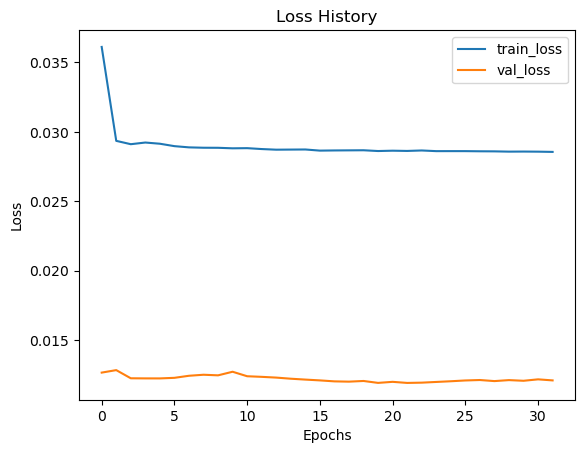

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

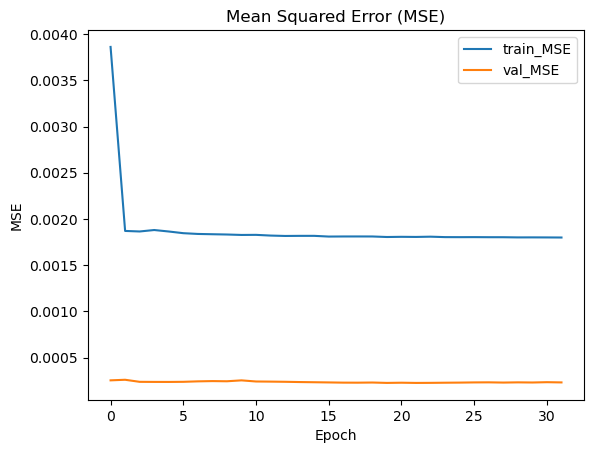

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

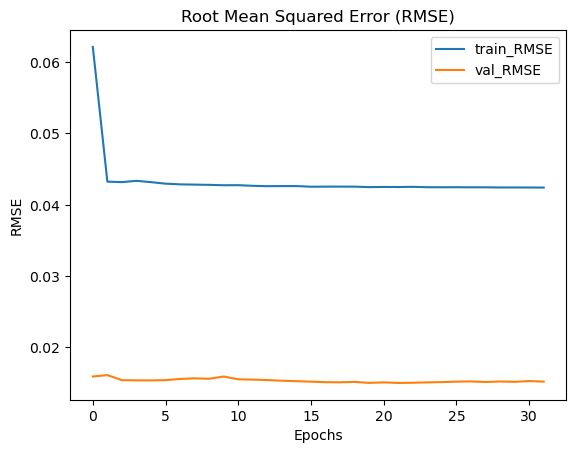

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

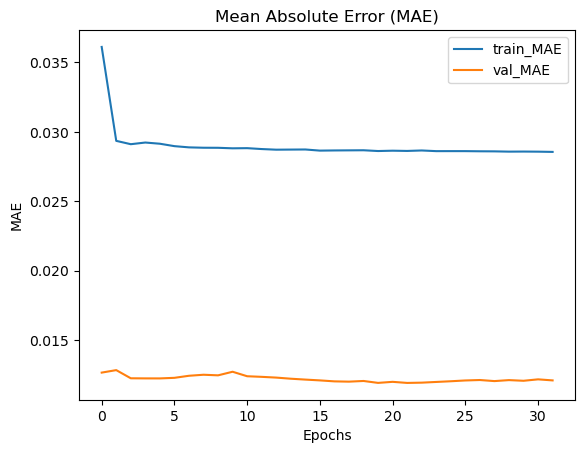

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

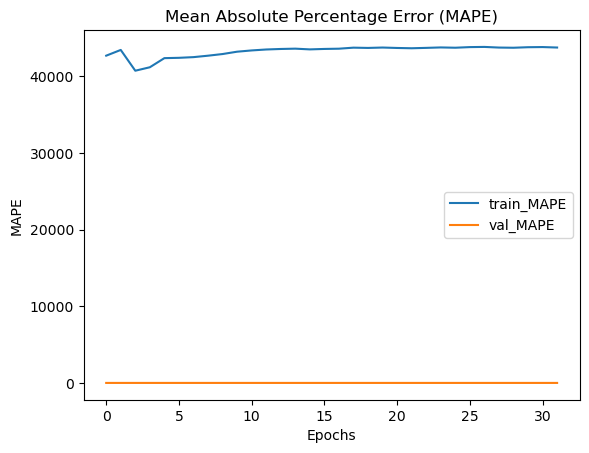

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 21:36:26.277282: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 2)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


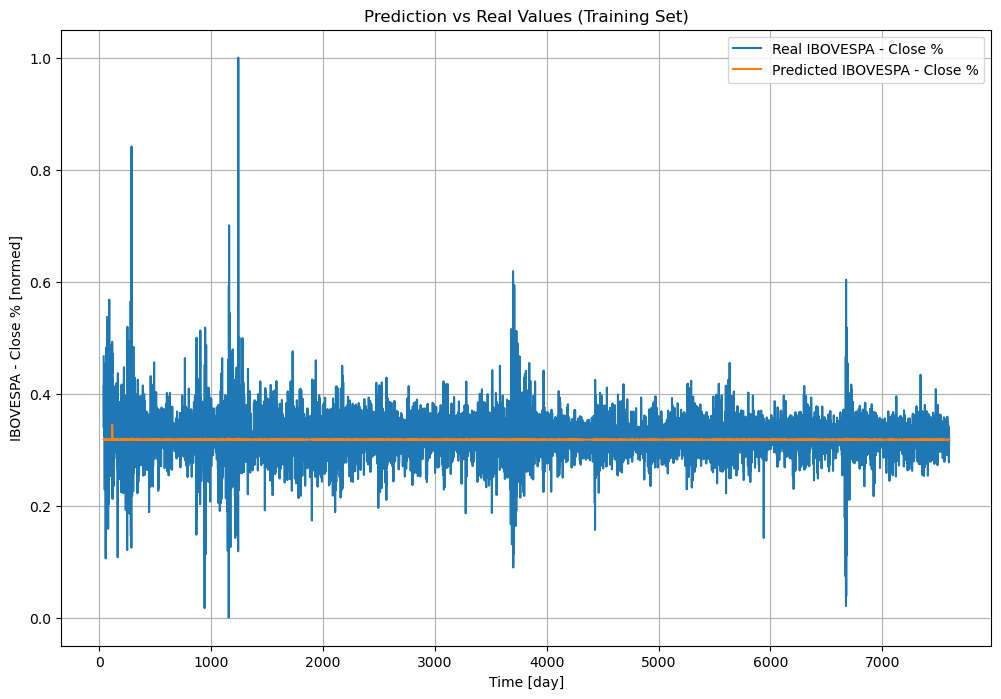

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 2)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


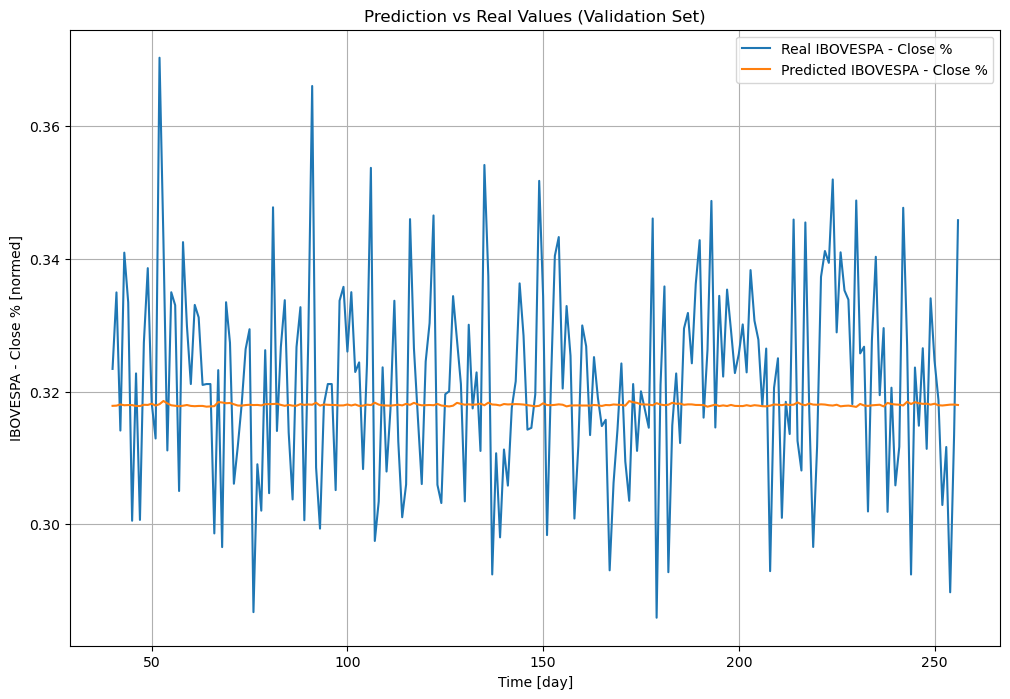

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 2)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


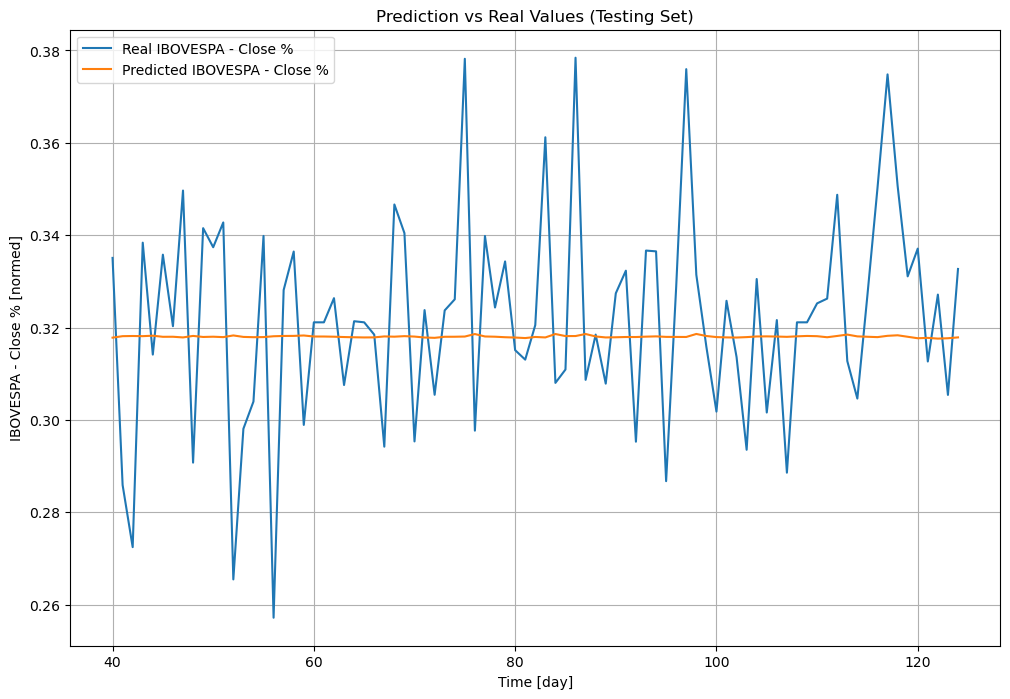

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

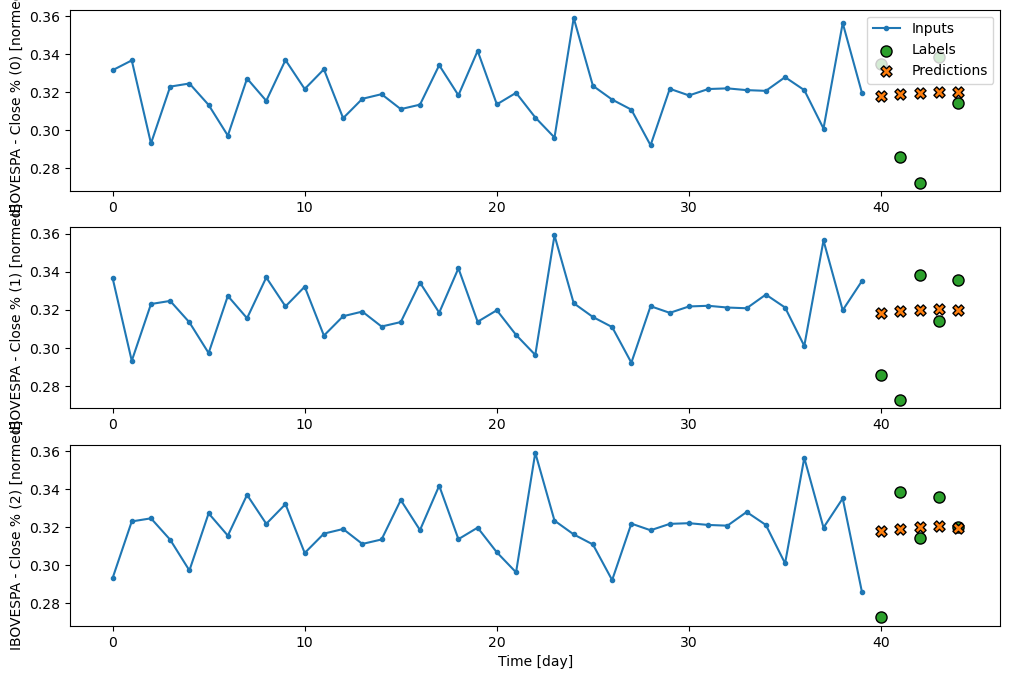

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:45s:553ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[[0.31782335, 0.31782335, 0.31782335, ..., 0.31782335,
         0.31782335, 0.31782335],
        [0.31888804, 0.31888804, 0.31888804, ..., 0.31888804,
         0.31888804, 0.31888804],
        [0.31943482, 0.31943482, 0.31943482, ..., 0.31943482,
         0.31943482, 0.31943482],
        [0.32015577, 0.32015577, 0.32015577, ..., 0.32015577,
         0.32015577, 0.32015577],
        [0.3202594 , 0.3202594 , 0.3202594 , ..., 0.3202594 ,
         0.3202594 , 0.3202594 ]],

       [[0.31814173, 0.31814173, 0.31814173, ..., 0.31814173,
         0.31814173, 0.31814173],
        [0.31921512, 0.31921512, 0.31921512, ..., 0.31921512,
         0.31921512, 0.31921512],
        [0.319789  , 0.319789  , 0.319789  , ..., 0.319789  ,
         0.319789  , 0.319789  ],
        [0.32050025, 0.32050025, 0.32050025, ..., 0.32050025,
         0.32050025, 0.32050025],
        [0.3197554 , 0.3197554 , 0.3197554 , ..., 0.3197554 ,
         0.3197554 , 0.3197554 ]],

       [[0.31817794, 0.31817794, 0.3

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')